 #  A Whale off the Port(folio)

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500.

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
%matplotlib inline
import seaborn as sns

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:
1. whale_returns.csv
2. algo_returns.csv
3. sp500_history.csv

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [2]:
# Reading whale returns
whale_returns_csv = Path("../Resources/whale_returns.csv")
df_whale_returns = pd.read_csv(whale_returns_csv)

In [3]:
#set index to date and sort in descending order
df_whale_returns.set_index(pd.to_datetime(df_whale_returns['Date'], infer_datetime_format=True), inplace=True)
df_whale_returns.drop(columns=['Date'], inplace=True)
df_whale_returns.sort_index(ascending=True, inplace=True)
df_whale_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [4]:
# Count nulls
df_whale_returns.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [5]:
# Drop nulls
df_whale_returns = df_whale_returns.dropna()
df_whale_returns.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [6]:
# Reading algorithmic returns
algo_returns_csv = Path("../Resources/algo_returns.csv")
df_algo_returns = pd.read_csv(algo_returns_csv)

In [7]:
#set index to date and sort in descending order
df_algo_returns.set_index(pd.to_datetime(df_algo_returns['Date'], infer_datetime_format=True), inplace=True)
df_algo_returns.drop(columns=['Date'], inplace=True)
df_algo_returns.sort_index(ascending=True, inplace=True)
df_algo_returns.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [8]:
# Count nulls
df_algo_returns.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [9]:
# Drop nulls
df_algo_returns = df_algo_returns.dropna()
df_algo_returns.isnull().sum()

Algo 1    0
Algo 2    0
dtype: int64

## S&P 500 Returns

Read the S&P500 Historic Closing Prices and create a new daily returns DataFrame from the data. 

In [10]:
# Reading S&P 500 Closing Prices
sp500_history_csv = Path("../Resources/sp500_history.csv")
df_sp500_returns = pd.read_csv(sp500_history_csv)

In [11]:
# set index to date
df_sp500_returns.set_index(pd.to_datetime(df_sp500_returns['Date'], infer_datetime_format=True), inplace=True)
df_sp500_returns.drop(columns=['Date'], inplace=True)
df_sp500_returns.sort_index(ascending=True, inplace=True)
df_sp500_returns.head()

,Close
Date,
2012-10-01,$1444.49
2012-10-02,$1445.75
2012-10-03,$1450.99
2012-10-04,$1461.40
2012-10-05,$1460.93


In [12]:
# Fix Data Types - replace $ with blank
df_sp500_returns.Close = df_sp500_returns.Close.str.replace('$', '')
df_sp500_returns.Close

Date
2012-10-01    1444.49
2012-10-02    1445.75
2012-10-03    1450.99
2012-10-04    1461.40
2012-10-05    1460.93
               ...   
2019-04-16    2907.06
2019-04-17    2900.45
2019-04-18    2905.03
2019-04-22    2907.97
2019-04-23    2933.68
Name: Close, Length: 1649, dtype: object

In [13]:
#set close price as float
df_sp500_returns.Close = df_sp500_returns.Close.astype('float')
df_sp500_returns.dtypes

Close    float64
dtype: object

In [14]:
df_sp500_returns.tail(10)

,Close
Date,
2019-04-09,2878.20
2019-04-10,2888.21
2019-04-11,2888.32
2019-04-12,2907.41
2019-04-15,2905.58
2019-04-16,2907.06
2019-04-17,2900.45
2019-04-18,2905.03
2019-04-22,2907.97


In [15]:
# Calculate Daily Returns
# YOUR CODE HERE
df_sp500_returns = df_sp500_returns.pct_change()
df_sp500_returns.tail()

,Close
Date,
2019-04-16,0.000509
2019-04-17,-0.002274
2019-04-18,0.001579
2019-04-22,0.001012
2019-04-23,0.008841


In [16]:
# see nulls
df_sp500_returns.isnull().sum()

Close    1
dtype: int64

In [17]:
# Drop nulls
# YOUR CODE HERE
df_sp500_returns = df_sp500_returns.dropna()
df_sp500_returns.isnull().sum()

Close    0
dtype: int64

In [18]:
# Rename Column - to "SP500"
# YOUR CODE HERE
df_sp500_returns = df_sp500_returns.rename(columns={'Close': 'SP500'})

In [19]:
df_sp500_returns.head()

,SP500
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457


## Combine Whale, Algorithmic, and S&P 500 Returns

In [20]:
# Concatenate all DataFrames into a single DataFrame
df_joined_returns = pd.concat([df_whale_returns, df_algo_returns, df_sp500_returns],axis='columns',sort=False)
df_joined_returns.isnull()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500
Date,,,,,,,
2012-10-02,True,True,True,True,True,True,False
2012-10-03,True,True,True,True,True,True,False
2012-10-04,True,True,True,True,True,True,False
2012-10-05,True,True,True,True,True,True,False
2012-10-08,True,True,True,True,True,True,False
...,...,...,...,...,...,...,...
2019-04-25,False,False,False,False,False,False,True
2019-04-26,False,False,False,False,False,False,True
2019-04-29,False,False,False,False,False,False,True


In [21]:
df_joined_returns = df_joined_returns.dropna()
df_joined_returns.isnull()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500
Date,,,,,,,
2015-03-03,False,False,False,False,False,False,False
2015-03-04,False,False,False,False,False,False,False
2015-03-05,False,False,False,False,False,False,False
2015-03-06,False,False,False,False,False,False,False
2015-03-09,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
2019-04-16,False,False,False,False,False,False,False
2019-04-17,False,False,False,False,False,False,False
2019-04-18,False,False,False,False,False,False,False


In [22]:
df_joined_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944


---

# Portfolio Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance

Calculate and Plot the daily returns and cumulative returns. 

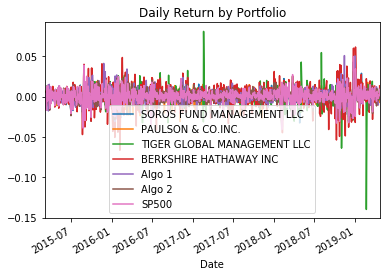

In [23]:
# Plot daily returns
df_joined_returns.plot(title = "Daily Return by Portfolio")

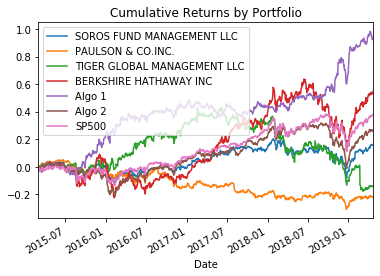

In [24]:
# Plot cumulative returns
joined_cumulative_returns = (1 + df_joined_returns).cumprod() - 1
joined_cumulative_returns.plot(title="Cumulative Returns by Portfolio")

---

## Risk

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

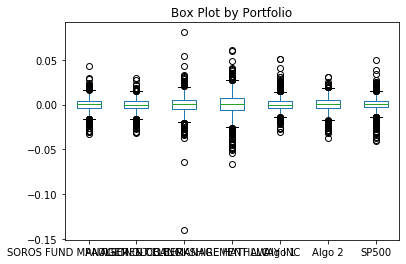

In [25]:
# Box plot to visually show risk
df_joined_returns.plot.box(title = "Box Plot by Portfolio")

In [26]:
# Daily Standard Deviations
# Calculate the standard deviation for each portfolio. Which portfolios are riskier than the S&P 500?
# YOUR CODE HERE
standard_deviations = df_joined_returns.std()

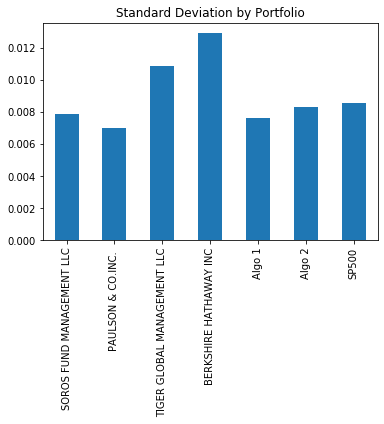

In [27]:
# Determine which portfolios are riskier than the S&P 500
standard_deviations.plot.bar(title = "Standard Deviation by Portfolio")
#Tiger Global Management and Bershire Hathaway have higher standard deviations; therefore are riskier based on that metric

In [28]:
# Calculate the annualized standard deviation (252 trading days)
df_joined_returns.rolling(window=252).std().tail(1)

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500
Date,,,,,,,
2019-04-23,0.009351,0.007338,0.014639,0.01521,0.008224,0.008602,0.009451


---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for the S&PP 500 using a 21 day window
2. Calcualte the correlation between each stock to determine which portfolios may mimick the S&P 500
2. Calculate and plot a 60 day Beta for Berkshire Hathaway Inc compared to the S&&P 500

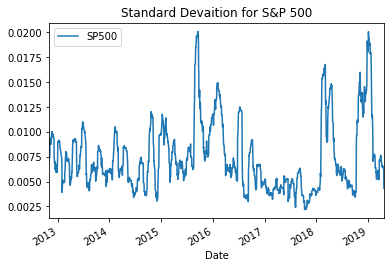

In [29]:
# Calculate and plot the rolling standard deviation for the S&PP 500 using a 21 day window
sp500_roll20_sdev = df_sp500_returns.rolling(window=21).std()
sp500_roll20_sdev = sp500_roll20_sdev.dropna()
sp500_roll20_sdev.plot(title = "Standard Devaition for S&P 500")

In [30]:
# Correlation
correlation = df_joined_returns.corr()
correlation
#the result is that the Algo 2 is the closest to the SP500 with a 0.8759 correlation, with the Soros Fund Management LLC coming in second closest at 0.838

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500
SOROS FUND MANAGEMENT LLC,1.000000,0.699914,0.561243,0.754360,0.321211,0.826873,0.837864
PAULSON & CO.INC.,0.699914,1.000000,0.434479,0.545623,0.268840,0.678152,0.669732
TIGER GLOBAL MANAGEMENT LLC,0.561243,0.434479,1.000000,0.424423,0.164387,0.507414,0.623946
BERKSHIRE HATHAWAY INC,0.754360,0.545623,0.424423,1.000000,0.292033,0.688082,0.751371
Algo 1,0.321211,0.268840,0.164387,0.292033,1.000000,0.288243,0.279494
Algo 2,0.826873,0.678152,0.507414,0.688082,0.288243,1.000000,0.858764
SP500,0.837864,0.669732,0.623946,0.751371,0.279494,0.858764,1.000000


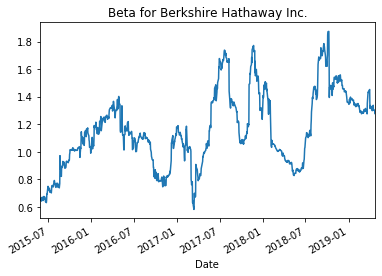

In [31]:
# Calculate Beta for a single portfolio compared to the total market (S&P 500)

berkshire_roll60_covariance = df_joined_returns['BERKSHIRE HATHAWAY INC'].rolling(window=60).cov(df_joined_returns['SP500'])
berkshire_roll60_variance = df_joined_returns['SP500'].rolling(window=60).var()

berkshire_roll60_beta = berkshire_roll60_covariance / berkshire_roll60_variance
berkshire_roll60_beta = berkshire_roll60_beta.dropna()

berkshire_roll60_beta.plot(title = "Beta for Berkshire Hathaway Inc.")


### Challenge: Exponentially Weighted Average 

An alternative way to calculate a rollwing window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the `ewm` with a 21 day half-life.

In [ ]:
# (OPTIONAL) YOUR CODE HERE

---

## Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. (After all, if you could invest in one of two portfolios, each offered the same 10% return, yet one offered lower risk, you'd take that one, right?)

Calculate and plot the annualized Sharpe ratios for all portfolios to determine which portfolio has the best performance

In [32]:
# Annualzied Sharpe Ratios
sharpe_ratios = (df_joined_returns.mean() * 252) / (df_joined_returns.std() * np.sqrt(252))
sharpe_ratios

SOROS FUND MANAGEMENT LLC      0.356417
PAULSON & CO.INC.             -0.483570
TIGER GLOBAL MANAGEMENT LLC   -0.121060
BERKSHIRE HATHAWAY INC         0.621810
Algo 1                         1.378648
Algo 2                         0.501364
SP500                          0.648267
dtype: float64

 plot() these sharpe ratios using a barplot.
 On the basis of this performance metric, do our algo strategies outperform both 'the market' and the whales?

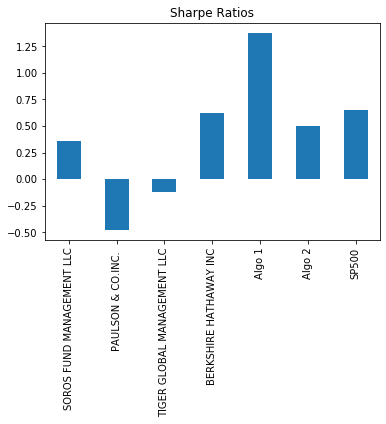

In [33]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind="bar", title="Sharpe Ratios")
# the Algo 1 portfolio has the highest Sharpe Ratio

---

# Portfolio Returns

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [34]:
# Reading AAPL close price
aapl_close_csv = Path("../Resources/aapl_historical.csv")
df_aapl_close = pd.read_csv(aapl_close_csv)
#set index to date and sort in descending order
df_aapl_close.rename(columns={'Trade DATE':"Date",'NOCP':'AAPL'}, inplace=True)
df_aapl_close.set_index(pd.to_datetime(df_aapl_close['Date'], infer_datetime_format=True), inplace=True)
df_aapl_close.drop(columns=['Date','Symbol'], inplace=True)
df_aapl_close.sort_index(ascending=True, inplace=True)
df_aapl_close.head()

,AAPL
Date,
2018-05-11,188.59
2018-05-14,188.15
2018-05-15,186.44
2018-05-16,188.18
2018-05-17,186.99


In [35]:
# Read the second stock
# Reading COST close price
cost_close_csv = Path("../Resources/cost_historical.csv")
df_cost_close = pd.read_csv(cost_close_csv)
#set index to date and sort in descending order
df_cost_close.rename(columns={'Trade DATE':"Date",'NOCP':'COST'}, inplace=True)
df_cost_close.set_index(pd.to_datetime(df_cost_close['Date'], infer_datetime_format=True), inplace=True)
df_cost_close.drop(columns=['Date','Symbol'], inplace=True)
df_cost_close.sort_index(ascending=True, inplace=True)
df_cost_close.head()

,COST
Date,
2018-05-11,195.76
2018-05-14,195.88
2018-05-15,195.48
2018-05-16,198.71
2018-05-17,199.60


In [36]:
# Read the third stock
# Reading GOOG close price
goog_close_csv = Path("../Resources/goog_historical.csv")
df_goog_close = pd.read_csv(goog_close_csv)
#set index to date and sort in descending order
df_goog_close.rename(columns={'Trade DATE':"Date",'NOCP':'GOOG'}, inplace=True)
df_goog_close.set_index(pd.to_datetime(df_goog_close['Date'], infer_datetime_format=True), inplace=True)
df_goog_close.drop(columns=['Date','Symbol'], inplace=True)
df_goog_close.sort_index(ascending=True, inplace=True)
df_goog_close.head()

,GOOG
Date,
2018-05-11,1098.26
2018-05-14,1100.20
2018-05-15,1079.23
2018-05-16,1081.77
2018-05-17,1078.59


In [37]:
# Concatenate all stocks into a single DataFrame
df_my_portfolio = pd.concat([df_aapl_close, df_cost_close, df_goog_close],axis='columns',sort=False)
df_my_portfolio.head()

,AAPL,COST,GOOG
Date,,,
2018-05-11,188.59,195.76,1098.26
2018-05-14,188.15,195.88,1100.20
2018-05-15,186.44,195.48,1079.23
2018-05-16,188.18,198.71,1081.77
2018-05-17,186.99,199.60,1078.59


In [47]:
# Reset the index
#this was done above

In [38]:
# Pivot the Data so that the stock tickers are the columns, the dates are the index, and the 
# values are the closing prices
#this was done above
df_my_portfolio

,AAPL,COST,GOOG
Date,,,
2018-05-11,188.59,195.76,1098.26
2018-05-14,188.15,195.88,1100.20
2018-05-15,186.44,195.48,1079.23
2018-05-16,188.18,198.71,1081.77
2018-05-17,186.99,199.60,1078.59
...,...,...,...
2019-05-03,211.75,244.62,1185.40
2019-05-06,208.48,244.23,1189.39
2019-05-07,202.86,240.18,1174.10


In [39]:
# Drop Nulls
# YOUR CODE HERE
df_my_portfolio = df_my_portfolio.dropna()
df_my_portfolio.isnull()

,AAPL,COST,GOOG
Date,,,
2018-05-11,False,False,False
2018-05-14,False,False,False
2018-05-15,False,False,False
2018-05-16,False,False,False
2018-05-17,False,False,False
...,...,...,...
2019-05-03,False,False,False
2019-05-06,False,False,False
2019-05-07,False,False,False


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [40]:
#first calc the portfolio daily returns
my_portfolio_returns = df_my_portfolio.pct_change()
my_portfolio_returns.head()

,AAPL,COST,GOOG
Date,,,
2018-05-11,NaN,NaN,NaN
2018-05-14,-0.002333,0.000613,0.001766
2018-05-15,-0.009088,-0.002042,-0.019060
2018-05-16,0.009333,0.016523,0.002354
2018-05-17,-0.006324,0.004479,-0.002940


In [41]:
# Calculate weighted portfolio returns
weights = [1/3, 1/3, 1/3]
my_weighted_returns = my_portfolio_returns.dot(weights)
my_weighted_returns

Date
2018-05-11         NaN
2018-05-14    0.000015
2018-05-15   -0.010064
2018-05-16    0.009403
2018-05-17   -0.001595
                ...   
2019-05-03    0.013329
2019-05-06   -0.004557
2019-05-07   -0.018798
2019-05-08   -0.000547
2019-05-09   -0.001751
Length: 250, dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [42]:
#joining to other set
df_all_portfolios = pd.concat([df_joined_returns,my_weighted_returns],axis='columns',sort=False)
df_all_portfolios.rename(columns={0:'James'}, inplace=True)
df_all_portfolios.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500,James
Date,,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539,NaN
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389,NaN
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196,NaN
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174,NaN
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944,NaN


In [43]:
# Only compare dates where the new, custom portfolio has dates
df_all_portfolios = df_all_portfolios.dropna()
df_all_portfolios.isnull()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500,James
Date,,,,,,,,
2018-05-14,False,False,False,False,False,False,False,False
2018-05-15,False,False,False,False,False,False,False,False
2018-05-16,False,False,False,False,False,False,False,False
2018-05-17,False,False,False,False,False,False,False,False
2018-05-18,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
2019-04-16,False,False,False,False,False,False,False,False
2019-04-17,False,False,False,False,False,False,False,False
2019-04-18,False,False,False,False,False,False,False,False


## Re-run the performance and risk analysis with your portfolio to see how it compares to the others

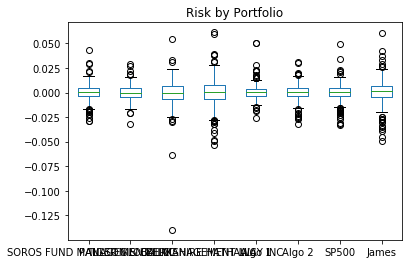

In [44]:
# Risk
df_all_portfolios.plot.box(title="Risk by Portfolio")

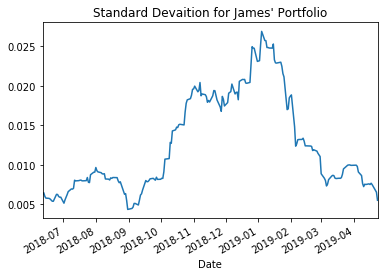

In [45]:
# Rolling
james_roll20_sdev = df_all_portfolios.James.rolling(window=21).std()
james_roll20_sdev = james_roll20_sdev.dropna()
james_roll20_sdev.plot(title = "Standard Devaition for James' Portfolio")

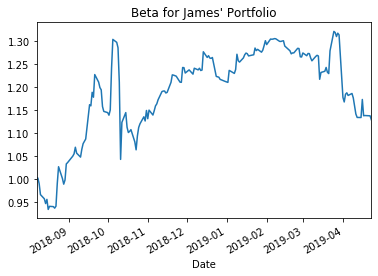

In [46]:
# Beta
# YOUR CODE HERE
james_roll60_covariance = df_all_portfolios['James'].rolling(window=60).cov(df_all_portfolios['SP500'])
james_roll60_variance = df_all_portfolios['SP500'].rolling(window=60).var()

james_roll60_beta = james_roll60_covariance / james_roll60_variance
james_roll60_beta = james_roll60_beta.dropna()

james_roll60_beta.plot(title = "Beta for James' Portfolio")

In [47]:
# Annualzied Sharpe Ratios
all_sharpe_ratios = (df_all_portfolios.mean() * 252) / (df_all_portfolios.std() * np.sqrt(252))
all_sharpe_ratios

SOROS FUND MANAGEMENT LLC      0.430713
PAULSON & CO.INC.              0.258738
TIGER GLOBAL MANAGEMENT LLC   -1.034216
BERKSHIRE HATHAWAY INC         0.159756
Algo 1                         2.035665
Algo 2                         0.080607
SP500                          0.584820
James                          0.933123
dtype: float64

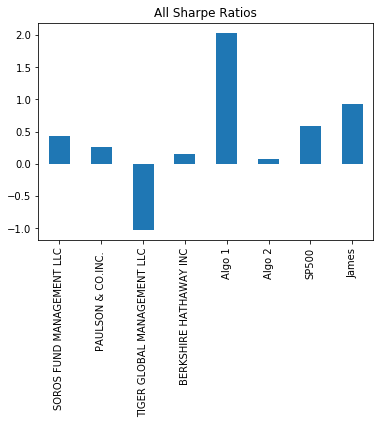

In [48]:
# Visualize the sharpe ratios as a bar plot
all_sharpe_ratios.plot(kind="bar", title="All Sharpe Ratios")
# the Algo 1 portfolio has the highest Sharpe Ratio

## Include correlation analysis to determine which stocks (if any) are correlated

In [49]:
# Correlation at portfolio level
correlation = df_all_portfolios.corr()
correlation
#the result is that the Algo 2 is the closest to the SP500 with a 0.8759 correlation, with mine (James) coming in second closest at 0.8719

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500,James
SOROS FUND MANAGEMENT LLC,1.000000,0.791962,0.478627,0.816675,0.337826,0.862846,0.876981,0.733250
PAULSON & CO.INC.,0.791962,1.000000,0.485375,0.650758,0.361301,0.783656,0.766680,0.644210
TIGER GLOBAL MANAGEMENT LLC,0.478627,0.485375,1.000000,0.325457,0.114554,0.409496,0.481030,0.391972
BERKSHIRE HATHAWAY INC,0.816675,0.650758,0.325457,1.000000,0.327000,0.782804,0.852303,0.801158
Algo 1,0.337826,0.361301,0.114554,0.327000,1.000000,0.365512,0.289358,0.261471
Algo 2,0.862846,0.783656,0.409496,0.782804,0.365512,1.000000,0.875721,0.739936
SP500,0.876981,0.766680,0.481030,0.852303,0.289358,0.875721,1.000000,0.871875
James,0.733250,0.644210,0.391972,0.801158,0.261471,0.739936,0.871875,1.000000


In [50]:
# Correlation at stock level
df_james_sp500 = pd.concat([my_portfolio_returns,df_sp500_returns],axis='columns',sort=False)
df_james_sp500 = df_james_sp500.dropna()
james_correlation = df_james_sp500.corr()
james_correlation
#the result is that GOOGLE is the closest to the SP500 with a 0.7921 correlation, with APPLE coming in second closest at 0.7599

,AAPL,COST,GOOG,SP500
AAPL,1.000000,0.433918,0.692497,0.759909
COST,0.433918,1.000000,0.410074,0.590297
GOOG,0.692497,0.410074,1.000000,0.792070
SP500,0.759909,0.590297,0.792070,1.000000
